#Machine Learning
`Autor: Erwing FC 
~erwingforerocastro@gmail.com`

###Datasets

In [24]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

# Conjunto de datos de cancer de mama
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

# Dataset de frutas
fruits = pd.read_csv('fruit_data_with_colors.csv') #subimos el archivo
X_fruits = fruits[['mass','width','height', 'color_score']]
y_fruits = fruits[['fruit_label']] - 1

array([[0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3]])

###Reducción de dimensionalidad y aprendizaje múltiple

######Análisis de componentes principales (PCA)

Uso de PCA para encontrar los dos primeros componentes principales del conjunto de datos del cáncer de mama

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

# Antes de aplicar PCA, cada característica debe estar centrada (media cero) y con varianza unitaria
X_normalized = StandardScaler().fit(X_cancer).transform(X_cancer)  

pca = PCA(n_components = 2).fit(X_normalized)

X_pca = pca.transform(X_normalized)
print(X_cancer.shape, X_pca.shape)

(569, 30) (569, 2)


######Trazado de la versión transformada por PCA del conjunto de datos de cáncer de mama

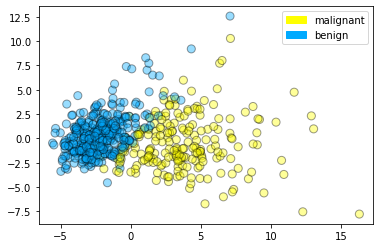

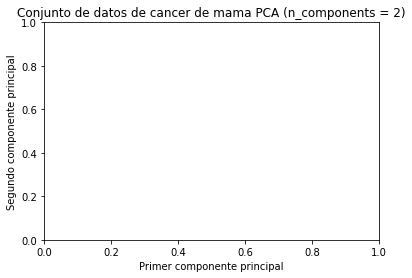

In [4]:
from adspy_shared_utilities import plot_labelled_scatter #subimos adspy_shared_utilities.py
plot_labelled_scatter(X_pca, y_cancer, ['malignant', 'benign'])

# plt.xlabel('Primer componente principal')
# plt.ylabel('Segundo componente principal')
# plt.title('Conjunto de datos de cancer de mama PCA (n_components = 2)');

######Trazar la magnitud de cada valor de característica para los dos primeros componentes principales

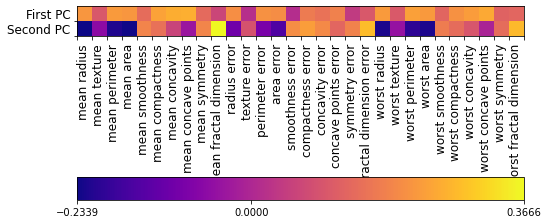

In [6]:
fig = plt.figure(figsize=(8, 4),facecolor='w')
plt.imshow(pca.components_, interpolation = 'none', cmap = 'plasma')
feature_names = list(cancer.feature_names)

plt.gca().set_xticks(np.arange(-.5, len(feature_names)));
plt.gca().set_yticks(np.arange(0.5, 2));
plt.gca().set_xticklabels(feature_names, rotation=90, ha='left', fontsize=12);
plt.gca().set_yticklabels(['First PC', 'Second PC'], va='bottom', fontsize=12);

plt.colorbar(orientation='horizontal', ticks=[pca.components_.min(), 0, 
                                              pca.components_.max()], pad=0.65);

######PCA en el conjunto de datos de frutas (para comparación)

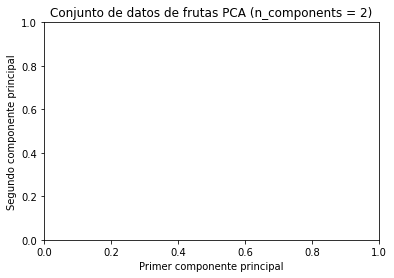

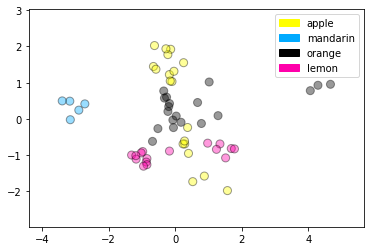

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from adspy_shared_utilities import plot_labelled_scatter

# cada característica debe estar centrada (media cero) y con varianza unitaria
X_normalized = StandardScaler().fit(X_fruits).transform(X_fruits)  

pca = PCA(n_components = 2).fit(X_normalized)
X_pca = pca.transform(X_normalized)
plot_labelled_scatter(X_pca, y_fruits.to_numpy(), ['apple','mandarin','orange','lemon'])

# plt.xlabel('Primer componente principal')
# plt.ylabel('Segundo componente principal')
# plt.title('Conjunto de datos de frutas PCA (n_components = 2)');

###Múltiples métodos de aprendizaje (MDS)

######Escalado multidimensional (MDS) en el conjunto de datos de frutas

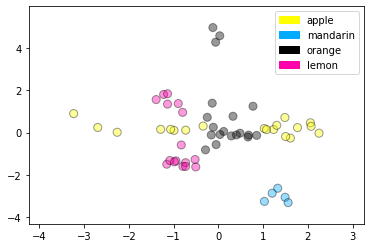

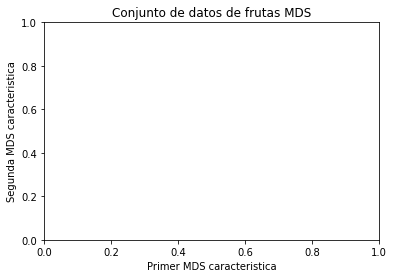

In [27]:
from adspy_shared_utilities import plot_labelled_scatter
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import MDS

# cada característica debe estar centrada (media cero) y con varianza unitaria
X_fruits_normalized = StandardScaler().fit(X_fruits).transform(X_fruits)  

mds = MDS(n_components = 2)

X_fruits_mds = mds.fit_transform(X_fruits_normalized)

plot_labelled_scatter(X_fruits_mds, y_fruits.to_numpy(), ['apple', 'mandarin', 'orange', 'lemon'])
# plt.xlabel('Primer MDS caracteristica')
# plt.ylabel('Segunda MDS caracteristica')
# plt.title('Conjunto de datos de frutas MDS');

######Escala multidimensional (MDS) en el conjunto de datos de cáncer de mama

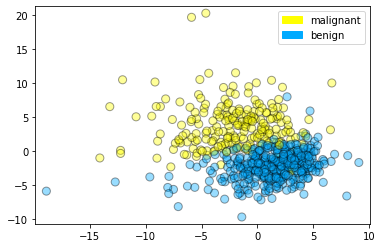

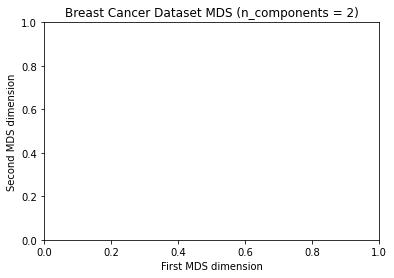

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import MDS
from sklearn.datasets import load_breast_cancer
from adspy_shared_utilities import plot_labelled_scatter

cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

# cada característica debe estar centrada (media cero) y con varianza unitaria
X_normalized = StandardScaler().fit(X_cancer).transform(X_cancer)  

mds = MDS(n_components = 2)

X_mds = mds.fit_transform(X_normalized)

plot_labelled_scatter(X_mds, y_cancer, ['malignant', 'benign'])

# plt.xlabel('First MDS dimension')
# plt.ylabel('Second MDS dimension')
# plt.title('Breast Cancer Dataset MDS (n_components = 2)');

######t-SNE en el conjunto de datos de frutas

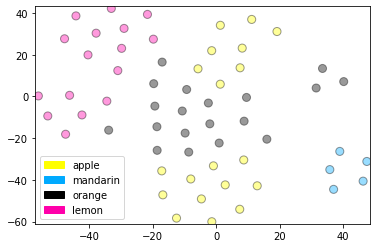

In [30]:
from sklearn.manifold import TSNE

tsne = TSNE(random_state = 0)

X_tsne = tsne.fit_transform(X_fruits_normalized)

plot_labelled_scatter(X_tsne, y_fruits.to_numpy(), 
    ['apple', 'mandarin', 'orange', 'lemon'])

######t-SNE en el conjunto de datos de cáncer de mama

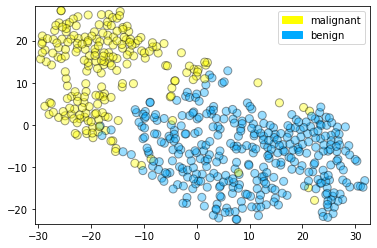

In [31]:
tsne = TSNE(random_state = 0)

X_tsne = tsne.fit_transform(X_normalized)

plot_labelled_scatter(X_tsne, y_cancer, 
    ['malignant', 'benign'])

###Clustering - Agrupación

######K-means

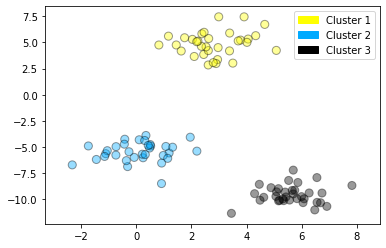

In [32]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from adspy_shared_utilities import plot_labelled_scatter

X, y = make_blobs(random_state = 10)

kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)

plot_labelled_scatter(X, kmeans.labels_, ['Cluster 1', 'Cluster 2', 'Cluster 3'])

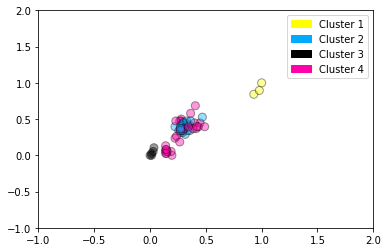

In [33]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from adspy_shared_utilities import plot_labelled_scatter
from sklearn.preprocessing import MinMaxScaler


X_fruits_normalized = MinMaxScaler().fit(X_fruits).transform(X_fruits)  

kmeans = KMeans(n_clusters = 4, random_state = 0)
kmeans.fit(X_fruits_normalized)

plot_labelled_scatter(X_fruits_normalized, kmeans.labels_, 
                      ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'])

######Agglomerative clustering - Agrupación aglomerativa

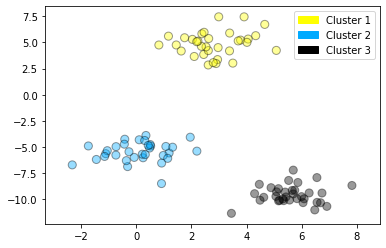

In [34]:
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from adspy_shared_utilities import plot_labelled_scatter

X, y = make_blobs(random_state = 10)

cls = AgglomerativeClustering(n_clusters = 3)
cls_assignment = cls.fit_predict(X)

plot_labelled_scatter(X, cls_assignment, 
        ['Cluster 1', 'Cluster 2', 'Cluster 3'])

######Creando un dendrograma (usando scipy)

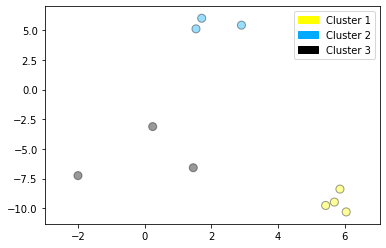

[[  5.69192445  -9.47641249]
 [  1.70789903   6.00435173]
 [  0.23621041  -3.11909976]
 [  2.90159483   5.42121526]
 [  5.85943906  -8.38192364]
 [  6.04774884 -10.30504657]
 [ -2.00758803  -7.24743939]
 [  1.45467725  -6.58387198]
 [  1.53636249   5.11121453]
 [  5.4307043   -9.75956122]]


In [35]:
X, y = make_blobs(random_state = 10, n_samples = 10)
plot_labelled_scatter(X, y, 
        ['Cluster 1', 'Cluster 2', 'Cluster 3'])
print(X)

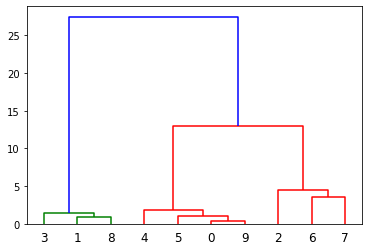

In [36]:
from scipy.cluster.hierarchy import ward, dendrogram
plt.figure()
dendrogram(ward(X))
plt.show()

###DBSCAN clustering - Clúster DBSCAN (Agrupación espacial basada en densidad de aplicaciones con ruido)

Valores de pertenencia al clúster:
[ 0  1  0  2  0  0  0  2  2 -1  1  2  0  0 -1  0  0  1 -1  1  1  2  2  2
  1]


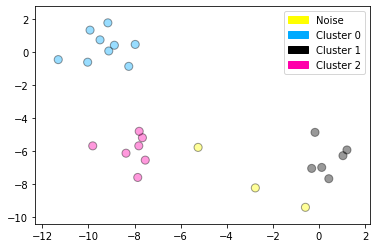

In [37]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state = 9, n_samples = 25)

dbscan = DBSCAN(eps = 2, min_samples = 2)

cls = dbscan.fit_predict(X)
print("Valores de pertenencia al clúster:\n{}".format(cls))

plot_labelled_scatter(X, cls + 1, 
        ['Noise', 'Cluster 0', 'Cluster 1', 'Cluster 2'])